# Úkol 3

Stáhni si data ze souboru [Life-Expectancy-Data-Updated.csv](soubory_03/Life-Expectancy-Data-Updated.csv), která udávají průměrnou dobu života v jednotlivých zemích světa. Data pocházejí od Světové zdravotnické organizace (WHO) a Světové banky. Vytvoř regresní model, jehož úkolem bude zjistit, které faktory ovlivňují průměrnou délku života.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# načtení dat
data_life_expectancy_base = pd.read_csv("Life-Expectancy-Data-Updated.txt")
#data_life_expectancy_base.info()
# data_life_expectancy_base.head()
# výběr roku 2015
data_life_expectancy_working = data_life_expectancy_base[data_life_expectancy_base["Year"] == 2015]
data_life_expectancy_working.head() # DF, která bude dále používána

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


Vytvoř regresní model, jehož úkolem bude zjistit, které faktory ovlivňují průměrnou délku života.

- Vyber data pro jeden konkrétní rok (např. pro rok 2015).
- Vysvětlovanou proměnnou ve tvém modelu bude `Life expectancy`, což je průměrná délka života.
- Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec `GDP_per_capita` (hrubý domácí produkt na hlavu v dolarech). Zobraz výsledek jako graf. Dále si zobraz tabulku s využitím metody využitím modulu `scipy` a metody `summary()` a zjisti koeficient determinace.

Model_A - `Life expectancy` - vysvětlovaná proměnná - `GDP_per_capita` - vysvětlující proměnná

Graf - regplot

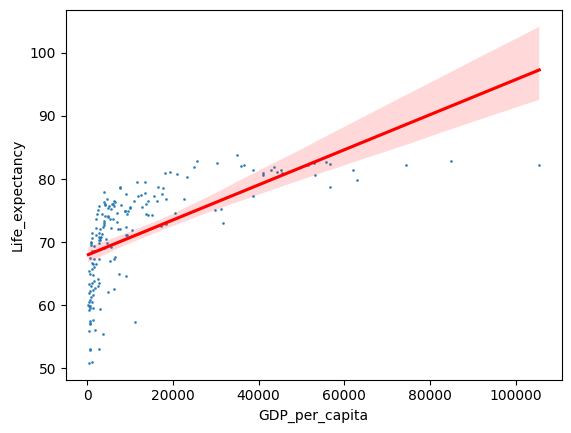

In [10]:
graf_model_A = sns.regplot(data_life_expectancy_working, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

OLS - výstup

koeficient determinace = 39,6% (R-squared:	0.396)

In [11]:
model_A = smf.ols(formula="Life_expectancy ~ GDP_per_capita", data=data_life_expectancy_working).fit()
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Wed, 24 May 2023   Prob (F-statistic):           3.90e-21
Time:                        20:03:20   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Do modelu přidej následující sloupce:

- `Schooling` - průměrná délka studia (v letech),
- `Incidents_HIV` - nákazy virem HIV (počet případů na osobu)
- `Diphtheria` - procento populace očkované proti záškrtu,
- `Polio` - procento populace očkované proti dětské obrně,
- `BMI` - průměrný BMI index populace,
- `Measles` - procento populace očkované proti spalničkám.

U každého sloupce se zamysli nad tím, jestli může délku života výrazně ovlivnit a jaké tipuješ znaménko koeficientu (kladné - zvyšuje délku života, záporné - snižuje délku života).

- Komentář:

| Proměnná        | Hypotéza - jak ovlivní Life_expectancy |
|-----------------|----------------------------------------|
| Schooling       | pozitivně                              |
| Incidents_HIV   | negativně                              |
| BMI             | pozitivně                              |


Model_B - `Life expectancy` - vysvětlovaná proměnná - `GDP_per_capita`,`Schooling`, `Incidents_HIV`, `Diphtheria`, `Polio`, `BMI`, `Measles` - vysvětlující proměnné

- Sestav model z vybraných sloupců

In [12]:
model_B = smf.ols(formula="Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles", data=data_life_expectancy_working).fit()
model_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.22e-54
Time:                        21:18:12   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Formuluj hypotézu o normalitě reziduí a otestuj ji s využitím modulu `scipy` a metody `summary()`. Jaký je výsledek - mají rezidua normální rozdělení?

 - Odpověď: Rezidua mají normální rozděleni

1. Formulace hypotezy:

   H0: Rezidua mají normální rozděleni - (p<0,05 zamítám H0 t.j. platí H1.....p>0,05 nezamítám H0) - 

   H1: Rezidua nemají normální rozdělení -

2. Výsledek OLS modelu:

   Prob(Omnibus):	0.143 > 0,05 ....nezamítám H0

   Prob(JB):	0.138 > 0,05      ....nezamítám H0

- Jaký je koeficient determinace výsledného modelu. Porovnej ho s koeficientem determinace, který vyšel z modelu, kde byl pouze hrubý domácí produkt. Jak se změnil? A co to znamená?

- Odpověď: koeficient determinace = 79% - (R-squared:	0.790)

1. Koeficient determinace - základní měřítko kvality modelu (R-squared)

R-squared - modelu_B (79%) se zhruba zdvojnásobil oproti R-squared - modelu_A (39,6%). 

Jinak řečeno model_B nám vysvětlí 79% změn proměnné Life_expectancy pomocí proměnných GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles....což je výrazně lepší výsledek než u modelu_A, kde máme vysvětleno jen 39,6% změn proměnné Life_expectancy pomocí proměnné GDP_per_capita. Jinými slovy přidáním dalších vysvětlujících proměnných jsme zlepšili % vysvětlení změn vysvětlované proměnné.

- Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce `P>|t|` a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?

odeberu proměnnou Diphtheria P>|t| = 0.946	

Model_C - `Life expectancy` - vysvětlovaná proměnná - `GDP_per_capita`,`Schooling`, `Incidents_HIV`, `Polio`, `BMI`, `Measles` - vysvětlující proměnné

Koeficient determinace model_C se nezměnil (R-squared:	0.790)

U ostatních koeficientů také nenastala výrazná změna.


| Proměnná        | coef.model_B |coef. model_C |
|-----------------|--------------|--------------|
| Intercept       | 37.9443      | 37.9505      |
| GDP_per_capita  | 0.0001       | 0.0001       |
| Schooling       | 0.8445       | 0.8455       |
| Incidents_HIV   | -1.4128      | -1.4129      |
| Diphtheria      | -0.0035      | NA           |
| Polio           | 0.1385       | 0.1349       |
| BMI             | 0.4254       | 0.4260       |
| Measles         | 0.0390       | 0.0389       |

In [13]:
model_C = smf.ols(formula="Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI + Measles", data=data_life_expectancy_working).fit()
model_C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.12e-55
Time:                        22:10:31   Log-Likelihood:                -482.14
No. Observations:                 179   AIC:                             978.3
Df Residuals:                     172   BIC:                             1001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9505      4.003      9.481      0.000      30.049      45.852
GDP_per_capita     0.0001   1.95e-05      5.594      0.000    7.06e-05       0.000
Schooling          0.8455      0.145      5.844      0.000       0.560       1.131
Incidents_HIV     -1.4129      0.173     -8.179      0.000      -1.754      -1.072
Polio              0.1349      0.026      5.106      0.000       0.083       0.187
BMI                0.4260      0.160      2.661      0.009       0.110       0.742
Measles            0.0389      0.022      1.737      0.084      -0.005       0.083
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.993
Skew:                          -0.348   Prob(JB):                        0.136
Kurtosis:                       2.773   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""